## Confirmatory factor analysis

1. prepare data
2. select observed variables and specify a model linking them to latent variables 
3. estimate factor loadings
4. study the estimated factor loadings and the model fit statistics
5. predict the values of latent variables

In [1]:
# !pip install factor_analyzer

### Load the necessary modules

In [2]:
import os, re
import pandas as pd
import numpy as np
from factor_analyzer import confirmatory_factor_analyzer as cfa
import matplotlib.pyplot as plt

### Set the working directory

In [3]:
os.chdir('C:\\Users\\andre\\Dropbox\\Teaching\\SSIM905\\data')

### Load the data

The data used for this demonstration is obtained from the 2021 Canadian Election Study (Stephenson, Laura B.; Harrell, Allison; Rubenson, Daniel; Loewen, Peter John, 2023, "Canadian Election Study 2021", https://doi.org/10.5683/SP3/MMXTFC). It can be accessed here:

[https://borealisdata.ca/dataset.xhtml?persistentId=doi:10.5683/SP3/MMXTFC](https://borealisdata.ca/dataset.xhtml?persistentId=doi:10.5683/SP3/MMXTFC)

In [4]:
ds0=pd.read_csv('CES2021tab.tab',sep='\t')

C:\Users\andre\AppData\Local\Temp\ipykernel_25476\430339018.py:1: DtypeWarning: Columns (20,604,616,626,628,635,674,680,719,739,763,895,1071,1080) have mixed types. Specify dtype option on import or set low_memory=False.
  ds0=pd.read_csv('CES2021tab.tab',sep='\t')


In [5]:
# ds0.head()

In [6]:
r = re.compile('pes21\\_populism')
pop_vars = list(filter(r.match, ds0.columns)) 

In [7]:
pop_dict = {
    'pes21_populism_2': "What people call compromise in politics is really just selling out on one's principles",
    'pes21_populism_3': "Most politicians do not care about the people",
    'pes21_populism_4': "Most politicians are trustworthy",
    'pes21_populism_6': "Having a strong leader in government is good for Canada even if the leader bends the rules to get things done",
    'pes21_populism_7': "The people, and not politicians, should make our most important policy decisions",
    'pes21_populism_8': "Most politicians care only about the interests of the rich and powerful"
}

In [8]:
ds = ds0.set_index(['cps21_ResponseId'])[pop_vars].replace(6, np.NaN)
ds_pop = ds[pop_vars].dropna()

In [9]:
# ds_pop.head()

### Specify the model

In [10]:
mod_dict = {'populism':pop_vars} 
mod = cfa.ModelSpecificationParser.parse_model_specification_from_dict(ds_pop, mod_dict)

### Estimate the parameters

In [11]:
est = cfa.ConfirmatoryFactorAnalyzer(mod)
est.fit(ds_pop.to_numpy())

ConfirmatoryFactorAnalyzer(n_obs=13456,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x00000258481C6E90>)

### Examine loadings

In [12]:
pd.DataFrame(est.loadings_, index=pop_dict.values())

,0
What people call compromise in politics is really just selling out on one's principles,0.599293
Most politicians do not care about the people,0.971636
Most politicians are trustworthy,-0.702589
Having a strong leader in government is good for Canada even if the leader bends the rules to get things done,0.026793
"The people, and not politicians, should make our most important policy decisions",0.585483
Most politicians care only about the interests of the rich and powerful,0.835000


In [13]:
est.factor_varcovs_

array([[1.]])

In [14]:
est.aic_

231534.4880245471

### Modify the model to keep only the variables with high loadings

In [15]:
pop_vars2 = ['pes21_populism_2','pes21_populism_3','pes21_populism_4','pes21_populism_7','pes21_populism_8']
mod_dict2 = {'populism':pop_vars2} 
mod2 = cfa.ModelSpecificationParser.parse_model_specification_from_dict(ds_pop[pop_vars2], mod_dict2)
est2 = cfa.ConfirmatoryFactorAnalyzer(mod2)
est2.fit(ds_pop[pop_vars2])

ConfirmatoryFactorAnalyzer(n_obs=13456,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x0000025855B5B750>)

In [16]:
pd.DataFrame(est2.loadings_, index=pop_vars2)

,0
pes21_populism_2,0.598722
pes21_populism_3,0.971957
pes21_populism_4,-0.703112
pes21_populism_7,0.585222
pes21_populism_8,0.834666


In [17]:
est2.aic_

187482.6088034073

In [18]:
est.transform(ds_pop).shape

(13456, 1)

### Computing scores

In [19]:
pred_pos = pd.DataFrame(est2.transform(ds_pop[pop_vars2]), index=ds_pop.index, columns=['populism'])
pred_pos.head()

,populism
cps21_ResponseId,
R_001Vw6R3CxCzbcR,0.558995
R_00AJoGE6B8Xifwl,-1.005941
R_00QYXuUFwGAZLgZ,0.979077
R_00Wyqmxv6ek6e3L,-0.388606
R_00nCP7AU1k5Xlkd,0.252439


<Axes: ylabel='Frequency'>

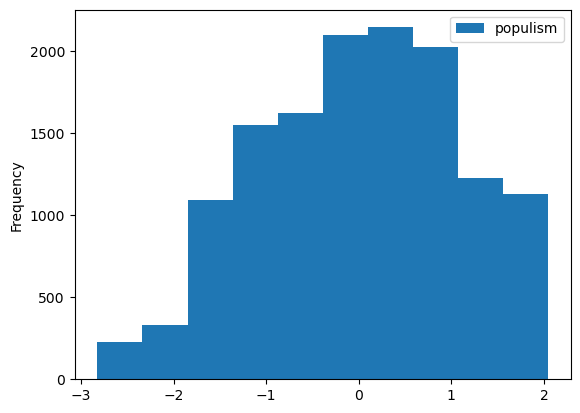

In [20]:
pred_pos.plot(kind='hist')